In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
len(coordinates)

1500

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

esperance au
salalah om
pompeu br
kytlym ru
omaruru na
arraial do cabo br
amderma ru
gaoua bf
hilo us
okoneshnikovo ru
ribeira grande pt
polyarnyy ru
kapaa us
severo-kurilsk ru
roald no
barentsburg sj
tecate mx
jamestown sh
nauta pe
charters towers au
yellowknife ca
nikolskoye ru
cape town za
bredasdorp za
havre-saint-pierre ca
saskylakh ru
punta arenas cl
rikitea pf
la rochelle fr
kuche cn
ushuaia ar
ushuaia ar
xining cn
chokurdakh ru
upernavik gl
cape town za
saldanha za
rikitea pf
saint-philippe re
araxa br
meulaboh id
norman wells ca
vaini to
neuquen ar
bronnoysund no
attawapiskat ca
rikitea pf
belushya guba ru
talnakh ru
airai pw
puerto ayora ec
atuona pf
ancud cl
palabuhanratu id
atuona pf
mys shmidta ru
acapulco mx
kaitangata nz
albany au
saint-leu re
san quintin mx
sitka us
bredasdorp za
sept-iles ca
taolanaro mg
puerto cabezas ni
new norfolk au
brigantine us
gallup us
busselton au
saldanha za
champerico gt
cidreira br
ponta do sol cv
barrow us
puerto ayora ec
kendari id
new no

cape town za
milkovo ru
khatanga ru
taolanaro mg
mys shmidta ru
jamestown sh
tuktoyaktuk ca
bredasdorp za
yeppoon au
coquimbo cl
puerto ayora ec
ushuaia ar
cajamarca pe
ribeira grande pt
bluff nz
cidreira br
asau tv
atambua id
port alfred za
qaanaaq gl
punta arenas cl
atuona pf
tabukiniberu ki
paamiut gl
hithadhoo mv
mpika zm
ushuaia ar
cairns au
te anau nz
cape town za
thompson ca
busselton au
longyearbyen sj
saskylakh ru
flinders au
raton us
asau tv
songea tz
ushuaia ar
tezu in
busselton au
kargil in
pevek ru
bolshaya irba ru
ushuaia ar
rikitea pf
butaritari ki
haines junction ca
chuy uy
new norfolk au
yulara au
faanui pf
longyearbyen sj
anayennisis gr
mataura pf
busselton au
yar-sale ru
new norfolk au
bengkulu id
chokurdakh ru
matagami ca
tual id
khatanga ru
marienburg sr
novoagansk ru
ushuaia ar
krasnoselkup ru
namatanai pg
muhos fi
billings us
norman wells ca
hilo us
the valley ai
nikolskoye ru
qaanaaq gl
airai pw
taolanaro mg
belushya guba ru
dunedin nz
albany au
laureles py
taol

saldanha za
attawapiskat ca
uglich ru
brae gb
attawapiskat ca
porto belo br
ola ru
georgetown sh
grand river south east mu
jamestown sh
vlasikha ru
tarabuco bo
palu id
plettenberg bay za
arraial do cabo br
kavieng pg
saleaula ws
kruisfontein za
punta arenas cl
belushya guba ru
chokurdakh ru
lebu cl
cidreira br
nikolskoye ru
chuy uy
kidal ml
mashhad ir
tuktoyaktuk ca
esperance au
hithadhoo mv
barentsburg sj
andenes no
bilibino ru
sitka us
clyde river ca
mayo ca
cape town za
ushuaia ar
puerto ayora ec
makakilo city us
port alfred za
barentsburg sj


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | esperance
Processing Record 2 of Set 12 | salalah
Processing Record 3 of Set 12 | pompeu
Processing Record 4 of Set 12 | kytlym
City not found. Skipping...
Processing Record 5 of Set 12 | omaruru
Processing Record 6 of Set 12 | arraial do cabo
Processing Record 7 of Set 12 | amderma
City not found. Skipping...
Processing Record 8 of Set 12 | gaoua
Processing Record 9 of Set 12 | hilo
Processing Record 10 of Set 12 | okoneshnikovo
Processing Record 11 of Set 12 | ribeira grande
Processing Record 12 of Set 12 | polyarnyy
Processing Record 13 of Set 12 | kapaa
Processing Record 14 of Set 12 | severo-kurilsk
Processing Record 15 of Set 12 | roald
Processing Record 16 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 12 | tecate
Processing Record 18 of Set 12 | jamestown
Processing Record 19 of Set 12 | nauta
Processing Record 20 of Set 12 | charters towers
Processing Re

Processing Record 34 of Set 15 | kabanjahe
Processing Record 35 of Set 15 | superior
Processing Record 36 of Set 15 | cap malheureux
Processing Record 37 of Set 15 | ossora
Processing Record 38 of Set 15 | ahuimanu
Processing Record 39 of Set 15 | puerto penasco
Processing Record 40 of Set 15 | porto velho
Processing Record 41 of Set 15 | smolyaninovo
Processing Record 42 of Set 15 | balingasay
Processing Record 43 of Set 15 | haines junction
Processing Record 44 of Set 15 | warqla
City not found. Skipping...
Processing Record 45 of Set 15 | zhigansk
Processing Record 46 of Set 15 | buluang
Processing Record 47 of Set 15 | phan rang
City not found. Skipping...
Processing Record 48 of Set 15 | klyuchevsk
Processing Record 49 of Set 15 | skibbereen
Processing Record 50 of Set 15 | saint-ambroise
Processing Record 1 of Set 16 | leningradskiy
Processing Record 2 of Set 16 | chuy
Processing Record 3 of Set 16 | bathsheba
Processing Record 4 of Set 16 | uk
City not found. Skipping...
Process

Processing Record 21 of Set 19 | matagami
Processing Record 22 of Set 19 | tual
Processing Record 23 of Set 19 | marienburg
Processing Record 24 of Set 19 | novoagansk
Processing Record 25 of Set 19 | krasnoselkup
Processing Record 26 of Set 19 | namatanai
Processing Record 27 of Set 19 | muhos
Processing Record 28 of Set 19 | billings
Processing Record 29 of Set 19 | the valley
Processing Record 30 of Set 19 | laureles
Processing Record 31 of Set 19 | nemuro
Processing Record 32 of Set 19 | itoman
Processing Record 33 of Set 19 | kaeo
Processing Record 34 of Set 19 | komsomolskiy
Processing Record 35 of Set 19 | campobello di mazara
Processing Record 36 of Set 19 | moranbah
Processing Record 37 of Set 19 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 19 | kismayo
Processing Record 39 of Set 19 | aitape
Processing Record 40 of Set 19 | souillac
Processing Record 41 of Set 19 | shiringushi
Processing Record 42 of Set 19 | grajau
Processing Record 43 of Set 19 | sredn

Processing Record 4 of Set 23 | vyazma
Processing Record 5 of Set 23 | north bend
Processing Record 6 of Set 23 | ta khmau
Processing Record 7 of Set 23 | mahibadhoo
Processing Record 8 of Set 23 | iisalmi
Processing Record 9 of Set 23 | cururupu
Processing Record 10 of Set 23 | ust-maya
Processing Record 11 of Set 23 | antigonish
Processing Record 12 of Set 23 | ahumada
City not found. Skipping...
Processing Record 13 of Set 23 | port-cartier
Processing Record 14 of Set 23 | grand gaube
Processing Record 15 of Set 23 | bismarck
Processing Record 16 of Set 23 | miraflores
Processing Record 17 of Set 23 | avera
Processing Record 18 of Set 23 | bargal
City not found. Skipping...
Processing Record 19 of Set 23 | honavar
Processing Record 20 of Set 23 | ituni
City not found. Skipping...
Processing Record 21 of Set 23 | nefteyugansk
Processing Record 22 of Set 23 | mahabad
Processing Record 23 of Set 23 | belaya gora
Processing Record 24 of Set 23 | batagay
Processing Record 25 of Set 23 | 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,64.24,79,100,19.06,AU,2022-03-31 17:58:42
1,Salalah,17.0151,54.0924,80.49,41,0,1.52,OM,2022-03-31 17:55:21
2,Pompeu,-19.2244,-44.9353,88.77,34,3,1.63,BR,2022-03-31 17:58:42
3,Omaruru,-21.4333,15.9333,75.83,55,90,4.83,NA,2022-03-31 17:58:43
4,Arraial Do Cabo,-22.9661,-42.0278,84.16,78,20,12.66,BR,2022-03-31 17:58:43
5,Gaoua,10.2992,-3.2508,96.96,26,74,6.58,BF,2022-03-31 17:58:44
6,Hilo,19.7297,-155.0900,75.61,92,1,1.01,US,2022-03-31 17:57:12
7,Okoneshnikovo,54.8377,75.0834,34.34,86,100,15.39,RU,2022-03-31 17:58:44
8,Ribeira Grande,38.5167,-28.7000,64.80,88,40,10.36,PT,2022-03-31 17:58:45
9,Polyarnyy,69.1989,33.4478,24.15,84,100,10.33,RU,2022-03-31 17:58:45


In [13]:
city_data_df=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2022-03-31 17:58:42,-33.8667,121.9000,64.24,79,100,19.06
1,Salalah,OM,2022-03-31 17:55:21,17.0151,54.0924,80.49,41,0,1.52
2,Pompeu,BR,2022-03-31 17:58:42,-19.2244,-44.9353,88.77,34,3,1.63
3,Omaruru,NA,2022-03-31 17:58:43,-21.4333,15.9333,75.83,55,90,4.83
4,Arraial Do Cabo,BR,2022-03-31 17:58:43,-22.9661,-42.0278,84.16,78,20,12.66
5,Gaoua,BF,2022-03-31 17:58:44,10.2992,-3.2508,96.96,26,74,6.58
6,Hilo,US,2022-03-31 17:57:12,19.7297,-155.0900,75.61,92,1,1.01
7,Okoneshnikovo,RU,2022-03-31 17:58:44,54.8377,75.0834,34.34,86,100,15.39
8,Ribeira Grande,PT,2022-03-31 17:58:45,38.5167,-28.7000,64.80,88,40,10.36
9,Polyarnyy,RU,2022-03-31 17:58:45,69.1989,33.4478,24.15,84,100,10.33


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

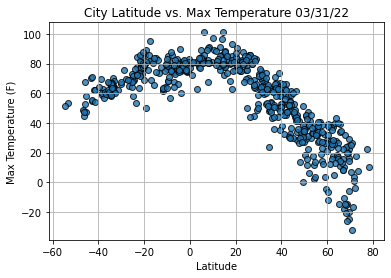

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

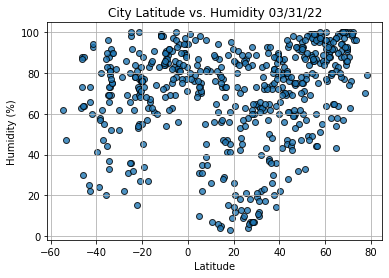

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

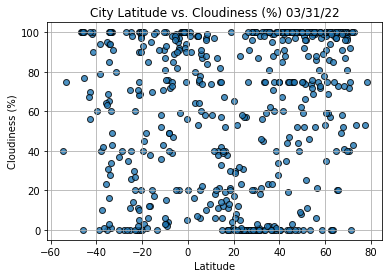

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


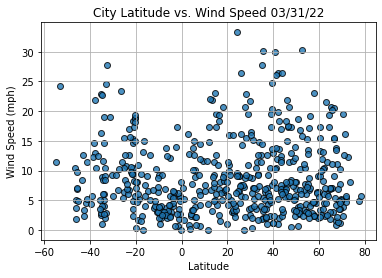

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [20]:
 # Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [23]:
index13=city_data_df.loc[13]
index13

City                       Tecate
Country                        MX
Date          2022-03-31 17:58:46
Lat                       32.5667
Lng                     -116.6333
Max Temp                    59.54
Humidity                       83
Cloudiness                     56
Wind Speed                   6.89
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Salalah,OM,2022-03-31 17:55:21,17.0151,54.0924,80.49,41,0,1.52
5,Gaoua,BF,2022-03-31 17:58:44,10.2992,-3.2508,96.96,26,74,6.58
6,Hilo,US,2022-03-31 17:57:12,19.7297,-155.0900,75.61,92,1,1.01
7,Okoneshnikovo,RU,2022-03-31 17:58:44,54.8377,75.0834,34.34,86,100,15.39
8,Ribeira Grande,PT,2022-03-31 17:58:45,38.5167,-28.7000,64.80,88,40,10.36


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

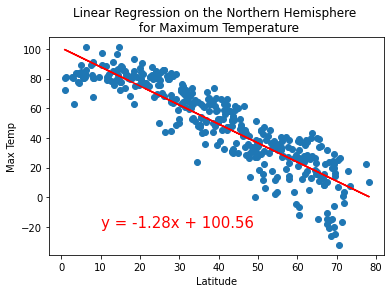

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-20))

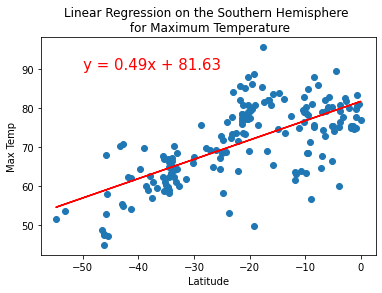

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

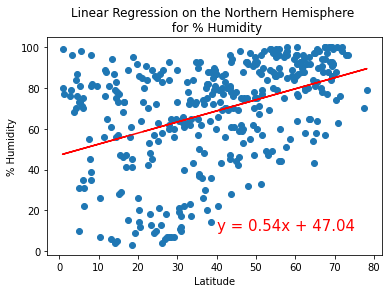

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

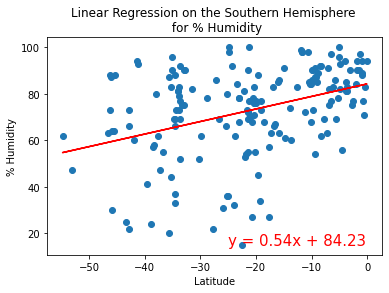

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,15))


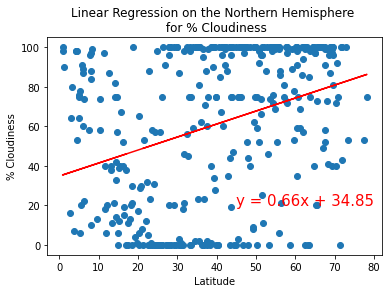

In [53]:
# Linear regression on the Northern Hemisphere for %cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,20))

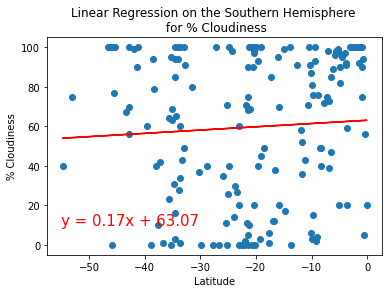

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,10))


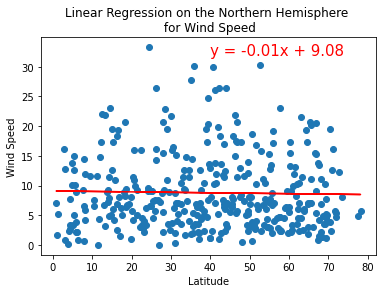

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,32))

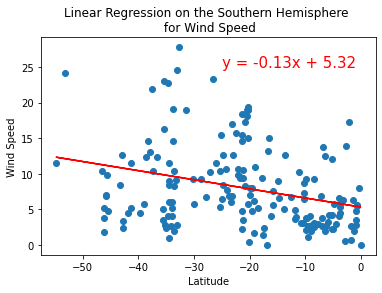

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,25))